# GEOG5990M Final Project 

## To explore the relationship between disability rates and Priority Places for Food Index in  Leeds(LSOA).

Student ID number: 201787097



In [1]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.colors
;
# import the required machine learning packages
from sklearn import cluster
from sklearn.preprocessing import scale

C:\Users\52231\AppData\Local\Temp\ipykernel_24272\1994577391.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data-preprocessing
Data preprocessing operations are first performed separately for different data sources.
### Disability rates

In [2]:
# Disability rates Data-preprocessing
dis_per = pd.read_csv('Disable_per.csv')
dis_per.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   lsoa11cd                                488 non-null    object 
 1   lsoa11nm                                488 non-null    object 
 2   All_usual_residents                     488 non-null    int64  
 3   Disabled_under_the_Equality_Act_number  488 non-null    int64  
 4   Disabled_under_the_Equality_Act%        488 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 19.2+ KB


Use the function <code>.describe()</code> to explore the different columns and get some basic summary statistics.

In [3]:
#Obtain descriptive statistics
dis_per.describe()

,All_usual_residents,Disabled_under_the_Equality_Act_number,Disabled_under_the_Equality_Act%
count,488.000000,488.000000,488.000000
mean,1663.760246,278.016393,16.827254
std,328.057549,77.917872,4.044081
min,1043.000000,81.000000,7.000000
25%,1462.000000,221.000000,13.900000
50%,1606.500000,272.000000,16.300000
75%,1790.000000,322.000000,19.625000
max,4344.000000,624.000000,34.900000


In [4]:
#Preview the data
dis_per.head()

,lsoa11cd,lsoa11nm,All_usual_residents,Disabled_under_the_Equality_Act_number,Disabled_under_the_Equality_Act%
0,E01011698,Leeds 001A,1464,226,15.4
1,E01011699,Leeds 001B,1290,179,13.9
2,E01011701,Leeds 001C,1367,212,15.5
3,E01011702,Leeds 001D,1650,175,10.6
4,E01011703,Leeds 001E,1223,199,16.3


Use <code>.isnull()</code> and <code>.sum()</code> functions to check for missing values.

In [5]:
# Checking missing data
dis_per.isnull().sum()

lsoa11cd                                  0
lsoa11nm                                  0
All_usual_residents                       0
Disabled_under_the_Equality_Act_number    0
Disabled_under_the_Equality_Act%          0
dtype: int64

Data can be found to be in good condition with no missing data.

**Box plots** are then used to visualise and analyse whether there are any irrationalities in the variables of the disability rate data and show their concentration trends

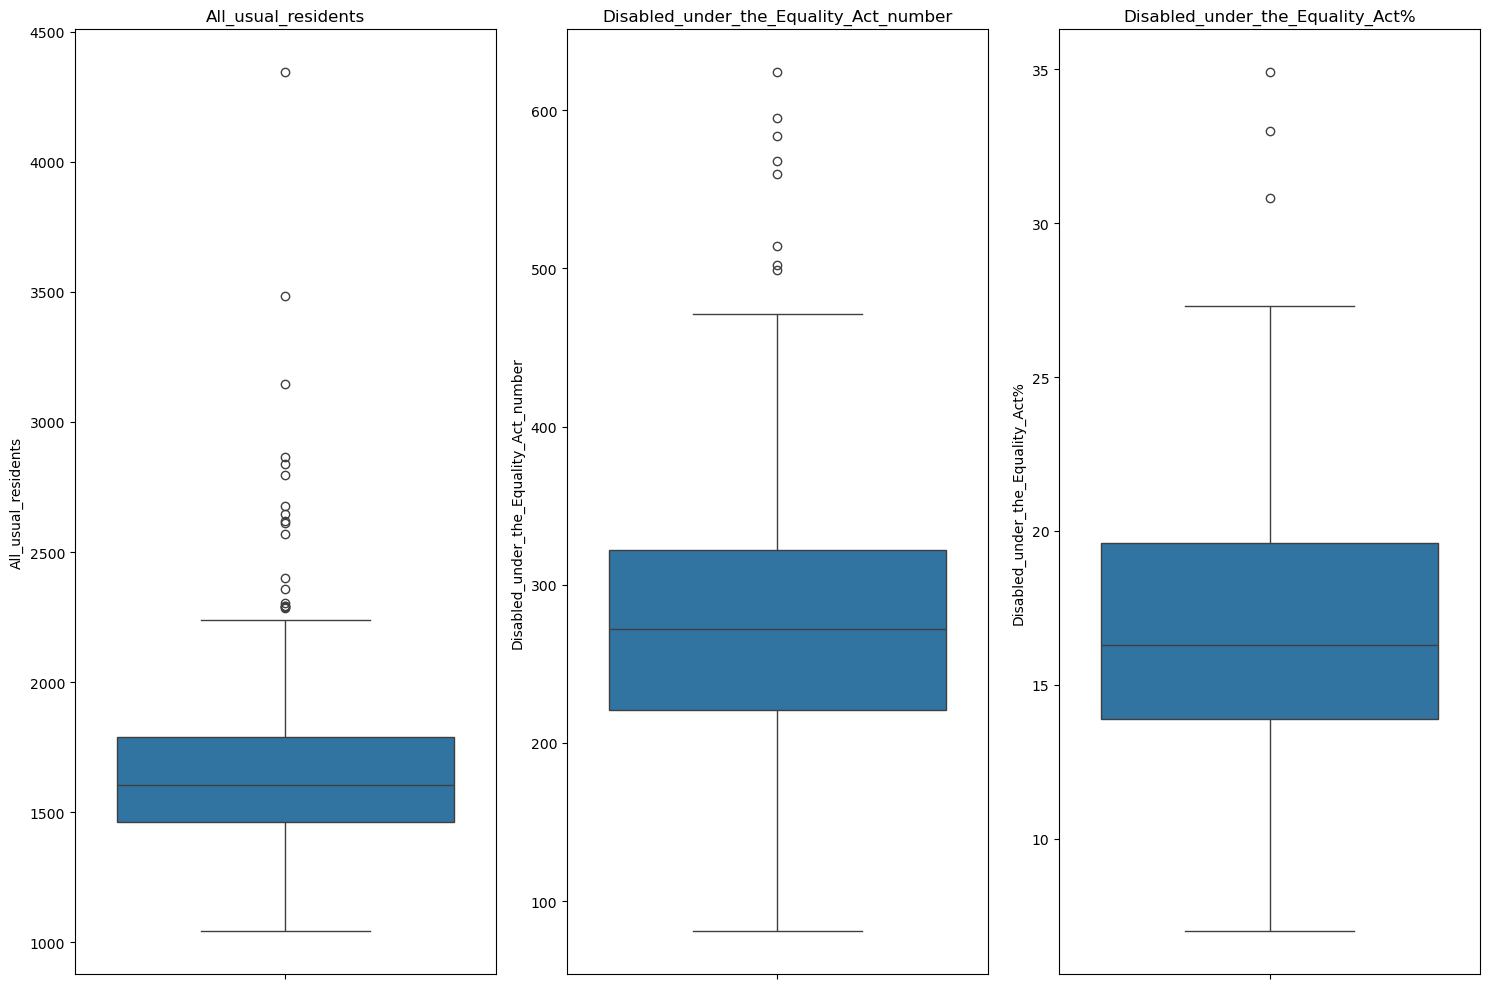

In [7]:
# Select only numeric columns
dis_per_numeric = dis_per.select_dtypes(include=np.number)
# Create a box plot for each numeric column
plt.figure(figsize=(15, 10)) # Set the size of the figure
for i, column in enumerate(dis_per_numeric.columns, 1): # Loop over numeric columns
        plt.subplot(1, 3, i)   # Create a subplot for each column
        sns.boxplot(y=dis_per_numeric[column]) # Create a boxplot of the column
        plt.title(column) # Set the title of the subplot to the column name

plt.tight_layout()   # Adjust subplots to fit into figure area
plt.show()    # Display the figure

Similar pre-processing operations are performed on Priority Places for Food Index data.
### Priority Places for Food Index Version 2(PPFI)

In [8]:
# PPFI data-preprocessing
PPFI = pd.read_csv('ppfi_index_v2_nov2023.csv')
PPFI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43538 entries, 0 to 43537
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   lsoa21cd                                 43538 non-null  object 
 1   domain_supermarket_proximity             43538 non-null  int64  
 2   domain_supermarket_accessibility         42648 non-null  float64
 3   domain_ecommerce_access                  42648 non-null  float64
 4   domain_socio_demographic                 43538 non-null  int64  
 5   domain_nonsupermarket_proximity          43538 non-null  int64  
 6   domain_food_for_families                 43538 non-null  int64  
 7   domain_fuel_poverty                      42648 non-null  float64
 8   country                                  43538 non-null  object 
 9   country_denominator                      43538 non-null  int64  
 10  combined                                 43538

In [9]:
#Obtain descriptive statistics
PPFI.describe()

,domain_supermarket_proximity,domain_supermarket_accessibility,domain_ecommerce_access,domain_socio_demographic,domain_nonsupermarket_proximity,domain_food_for_families,domain_fuel_poverty,country_denominator,combined,pp_dec_domain_supermarket_proximity,pp_dec_domain_supermarket_accessibility,pp_dec_domain_ecommerce_access,pp_dec_domain_socio_demographic,pp_dec_domain_nonsupermarket_proximity,pp_dec_domain_food_for_families,pp_dec_domain_fuel_poverty,pp_dec_combined
count,43538.000000,42648.000000,42648.000000,43538.000000,43538.000000,43538.000000,42648.000000,43538.000000,43538.000000,43538.000000,42648.000000,42648.000000,43538.000000,43538.000000,43538.000000,42648.000000,43538.000000
mean,13695.795925,13972.308995,13257.434721,13695.792159,13695.795902,13695.795925,13971.904169,27390.591897,13695.795948,5.499931,5.499930,5.276707,5.499931,5.499931,5.499931,5.499719,5.499931
std,10467.029461,10397.272977,10223.045612,10467.032654,10467.029502,10467.029472,10397.629271,11879.001522,10467.029443,2.872458,2.872462,2.931837,2.872458,2.872458,2.872458,2.872462,2.872458
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4039.250000,4373.000000,4068.000000,4039.250000,4039.250000,4039.250000,4373.000000,33755.000000,4039.250000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,11986.500000,12431.500000,9458.000000,11986.500000,11986.500000,11986.500000,12431.500000,33755.000000,11986.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,22870.750000,23093.250000,22662.000000,22870.750000,22870.750000,22870.750000,23093.250000,33755.000000,22870.750000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,33755.000000,33755.000000,33740.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,33755.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
#Preview the data
PPFI.head()

,lsoa21cd,domain_supermarket_proximity,domain_supermarket_accessibility,domain_ecommerce_access,domain_socio_demographic,domain_nonsupermarket_proximity,domain_food_for_families,domain_fuel_poverty,country,country_denominator,combined,pp_dec_domain_supermarket_proximity,pp_dec_domain_supermarket_accessibility,pp_dec_domain_ecommerce_access,pp_dec_domain_socio_demographic,pp_dec_domain_nonsupermarket_proximity,pp_dec_domain_food_for_families,pp_dec_domain_fuel_poverty,pp_dec_combined
0,95AA01S1,480,NaN,NaN,810,518,760,NaN,NI,890,810,6,NaN,NaN,10,6,9,NaN,10
1,95AA01S2,446,NaN,NaN,789,511,793,NaN,NI,890,807,6,NaN,NaN,9,6,9,NaN,10
2,95AA01S3,435,NaN,NaN,688,291,686,NaN,NI,890,549,5,NaN,NaN,8,4,8,NaN,7
3,95AA02W1,714,NaN,NaN,470,661,237,NaN,NI,890,454,9,NaN,NaN,6,8,3,NaN,6
4,95AA03W1,344,NaN,NaN,218,467,614,NaN,NI,890,242,4,NaN,NaN,3,6,7,NaN,3


In [11]:
# Checking missing data
PPFI.isnull().sum()

lsoa21cd                                     0
domain_supermarket_proximity                 0
domain_supermarket_accessibility           890
domain_ecommerce_access                    890
domain_socio_demographic                     0
domain_nonsupermarket_proximity              0
domain_food_for_families                     0
domain_fuel_poverty                        890
country                                      0
country_denominator                          0
combined                                     0
pp_dec_domain_supermarket_proximity          0
pp_dec_domain_supermarket_accessibility    890
pp_dec_domain_ecommerce_access             890
pp_dec_domain_socio_demographic              0
pp_dec_domain_nonsupermarket_proximity       0
pp_dec_domain_food_for_families              0
pp_dec_domain_fuel_poverty                 890
pp_dec_combined                              0
dtype: int64

**Here, some variables were found to have missing data, but considering that they may be related to other geographic divisions(the number of all missing values is consistently 890), no missing value processing operations will be performed at this time.**

Also using **Boxplot** visualisations to explore PPFI data.

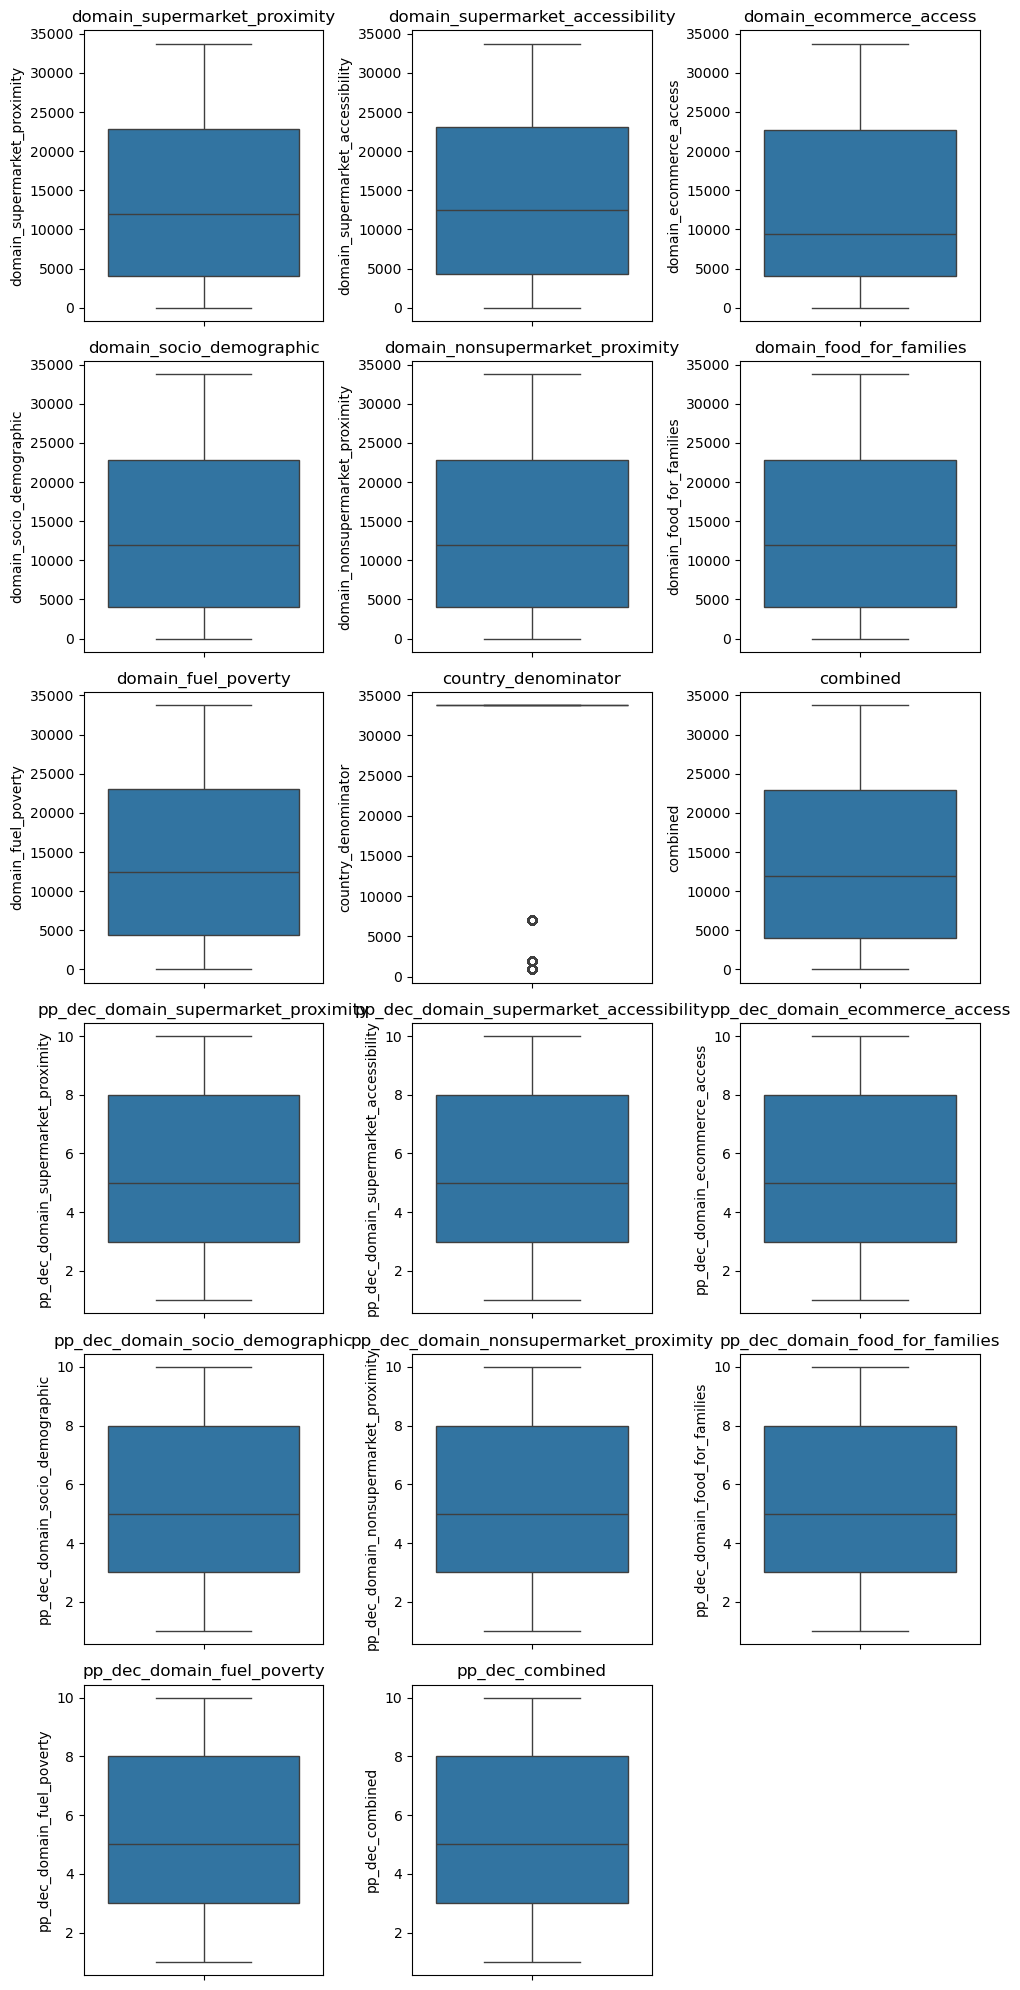

In [12]:
# Select only numeric columns
PPFI_numeric = PPFI.select_dtypes(include=np.number)
# Create a box plot for each numeric column
plt.figure(figsize=(10, 20)) # Set the size of the figure
for i, column in enumerate(PPFI_numeric.columns, 1): # Loop over numeric columns
        plt.subplot(6, 3, i)   # Create a subplot for each column
        sns.boxplot(y=PPFI_numeric[column]) # Create a boxplot of the column
        plt.title(column) # Set the title of the subplot to the column name

plt.tight_layout()   # Adjust subplots to fit into figure area
plt.show()    # Display the figure

**It can be noticed that the dataset has been better preprocessed and all the records are complete without any outliers.**

### Geodata

Read in the LSOA shp file for Leeds for geo-correlation analysis and visualisation.

In [13]:
# Load the GeoJSON file for the 2021 Lower Layer Super Output Areas (LSOA) in England and Wales
# The file is downloaded from the UK's official statistics geospatial portal
# shp = gpd.read_file('/Users/fran/Downloads/Lower_layer_Super_Output_Areas_2021_EW_BFE_V9_-3647710721716634062.geojson')

# Filter the DataFrame to include only the entries where the 'LSOA21NM' field contains 'Leeds'
# This step narrows down the data to the Leeds area, making the dataset more manageable for local analysis
# leeds_shp = shp.loc[shp['LSOA21NM'].str.contains('Leeds'), :]

# Save the filtered data to a new GeoJSON file, specifically for the Leeds LSOAs
# This enables easy sharing and reuse of the Leeds-specific geographical data
# leeds_shp.to_file('Leeds.geojson')

The above shows how to download Leeds shp data. The code is commented so as not to duplicate downloads.

In [14]:
# Load the GeoJSON 
leeds_shp =gpd.read_file('Leeds.geojson')
leeds_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FID       488 non-null    int64   
 1   LSOA21CD  488 non-null    object  
 2   LSOA21NM  488 non-null    object  
 3   BNG_E     488 non-null    int64   
 4   BNG_N     488 non-null    int64   
 5   LONG      488 non-null    float64 
 6   LAT       488 non-null    float64 
 7   GlobalID  488 non-null    object  
 8   geometry  488 non-null    geometry
dtypes: float64(2), geometry(1), int64(3), object(3)
memory usage: 34.4+ KB


In [15]:
#Obtain descriptive statistics of Geodata
leeds_shp.describe()

,FID,BNG_E,BNG_N,LONG,LAT
count,488.000000,488.000000,488.000000,488.000000,488.000000
mean,13058.920082,429745.625000,434948.334016,-1.549768,53.809959
std,6290.620828,5765.760679,4842.130100,0.087553,0.043536
min,10720.000000,415777.000000,424017.000000,-1.761510,53.711780
25%,10841.750000,425662.500000,432060.750000,-1.611580,53.784145
50%,10963.500000,429497.000000,434871.000000,-1.553585,53.809380
75%,11085.250000,433151.750000,437635.000000,-1.498177,53.834153
max,33049.000000,444141.000000,449492.000000,-1.330510,53.940040


In [16]:
# Checking missing data
leeds_shp.isnull().sum()

FID         0
LSOA21CD    0
LSOA21NM    0
BNG_E       0
BNG_N       0
LONG        0
LAT         0
GlobalID    0
geometry    0
dtype: int64

In [17]:
# Check the CRS of leeds_shp
leeds_shp.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
# Simply explore
leeds_shp.explore()

## Join the PPFI data and disability data to the spatial dataframe of Leeds

In [18]:
# First join the PPFI data to the leeds_shp geodataframe using a lefthand join, on the common ID 'LSOA21CD'/'lsoa21cd'
leeds_PPFI =leeds_shp.merge(PPFI, how='left',left_on='LSOA21CD',right_on='lsoa21cd')

In [19]:
#Check the PPFI left join outcome
leeds_PPFI.columns

Index(['FID', 'LSOA21CD', 'LSOA21NM', 'BNG_E', 'BNG_N', 'LONG', 'LAT',
       'GlobalID', 'geometry', 'lsoa21cd', 'domain_supermarket_proximity',
       'domain_supermarket_accessibility', 'domain_ecommerce_access',
       'domain_socio_demographic', 'domain_nonsupermarket_proximity',
       'domain_food_for_families', 'domain_fuel_poverty', 'country',
       'country_denominator', 'combined',
       'pp_dec_domain_supermarket_proximity',
       'pp_dec_domain_supermarket_accessibility',
       'pp_dec_domain_ecommerce_access', 'pp_dec_domain_socio_demographic',
       'pp_dec_domain_nonsupermarket_proximity',
       'pp_dec_domain_food_for_families', 'pp_dec_domain_fuel_poverty',
       'pp_dec_combined'],
      dtype='object')

In [ ]:
#Check whether it has worked
leeds_PPFI.explore('pp_dec_domain_supermarket_accessibility', cmap='Reds_r')

In [20]:
# Then join the disability data to the leeds_shp geodataframe using a lefthand join, on the common ID 'LSOA21CD'/'lsoa11cd'
leeds_PPFI_dis =leeds_PPFI.merge(dis_per, how='left',left_on='LSOA21CD',right_on='lsoa11cd')

In [21]:
#Check the disability data  left join outcome
leeds_PPFI_dis.columns

Index(['FID', 'LSOA21CD', 'LSOA21NM', 'BNG_E', 'BNG_N', 'LONG', 'LAT',
       'GlobalID', 'geometry', 'lsoa21cd', 'domain_supermarket_proximity',
       'domain_supermarket_accessibility', 'domain_ecommerce_access',
       'domain_socio_demographic', 'domain_nonsupermarket_proximity',
       'domain_food_for_families', 'domain_fuel_poverty', 'country',
       'country_denominator', 'combined',
       'pp_dec_domain_supermarket_proximity',
       'pp_dec_domain_supermarket_accessibility',
       'pp_dec_domain_ecommerce_access', 'pp_dec_domain_socio_demographic',
       'pp_dec_domain_nonsupermarket_proximity',
       'pp_dec_domain_food_for_families', 'pp_dec_domain_fuel_poverty',
       'pp_dec_combined', 'lsoa11cd', 'lsoa11nm', 'All_usual_residents',
       'Disabled_under_the_Equality_Act_number',
       'Disabled_under_the_Equality_Act%'],
      dtype='object')

In [ ]:
#Check whether it has worked
leeds_PPFI_dis.explore('Disabled_under_the_Equality_Act%', cmap='Reds')

Then some data preprocessing operations are performed on the final data.

In [22]:
# Checking missing data
leeds_PPFI_dis.isnull().sum()

FID                                        0
LSOA21CD                                   0
LSOA21NM                                   0
BNG_E                                      0
BNG_N                                      0
LONG                                       0
LAT                                        0
GlobalID                                   0
geometry                                   0
lsoa21cd                                   0
domain_supermarket_proximity               0
domain_supermarket_accessibility           0
domain_ecommerce_access                    0
domain_socio_demographic                   0
domain_nonsupermarket_proximity            0
domain_food_for_families                   0
domain_fuel_poverty                        0
country                                    0
country_denominator                        0
combined                                   0
pp_dec_domain_supermarket_proximity        0
pp_dec_domain_supermarket_accessibility    0
pp_dec_dom

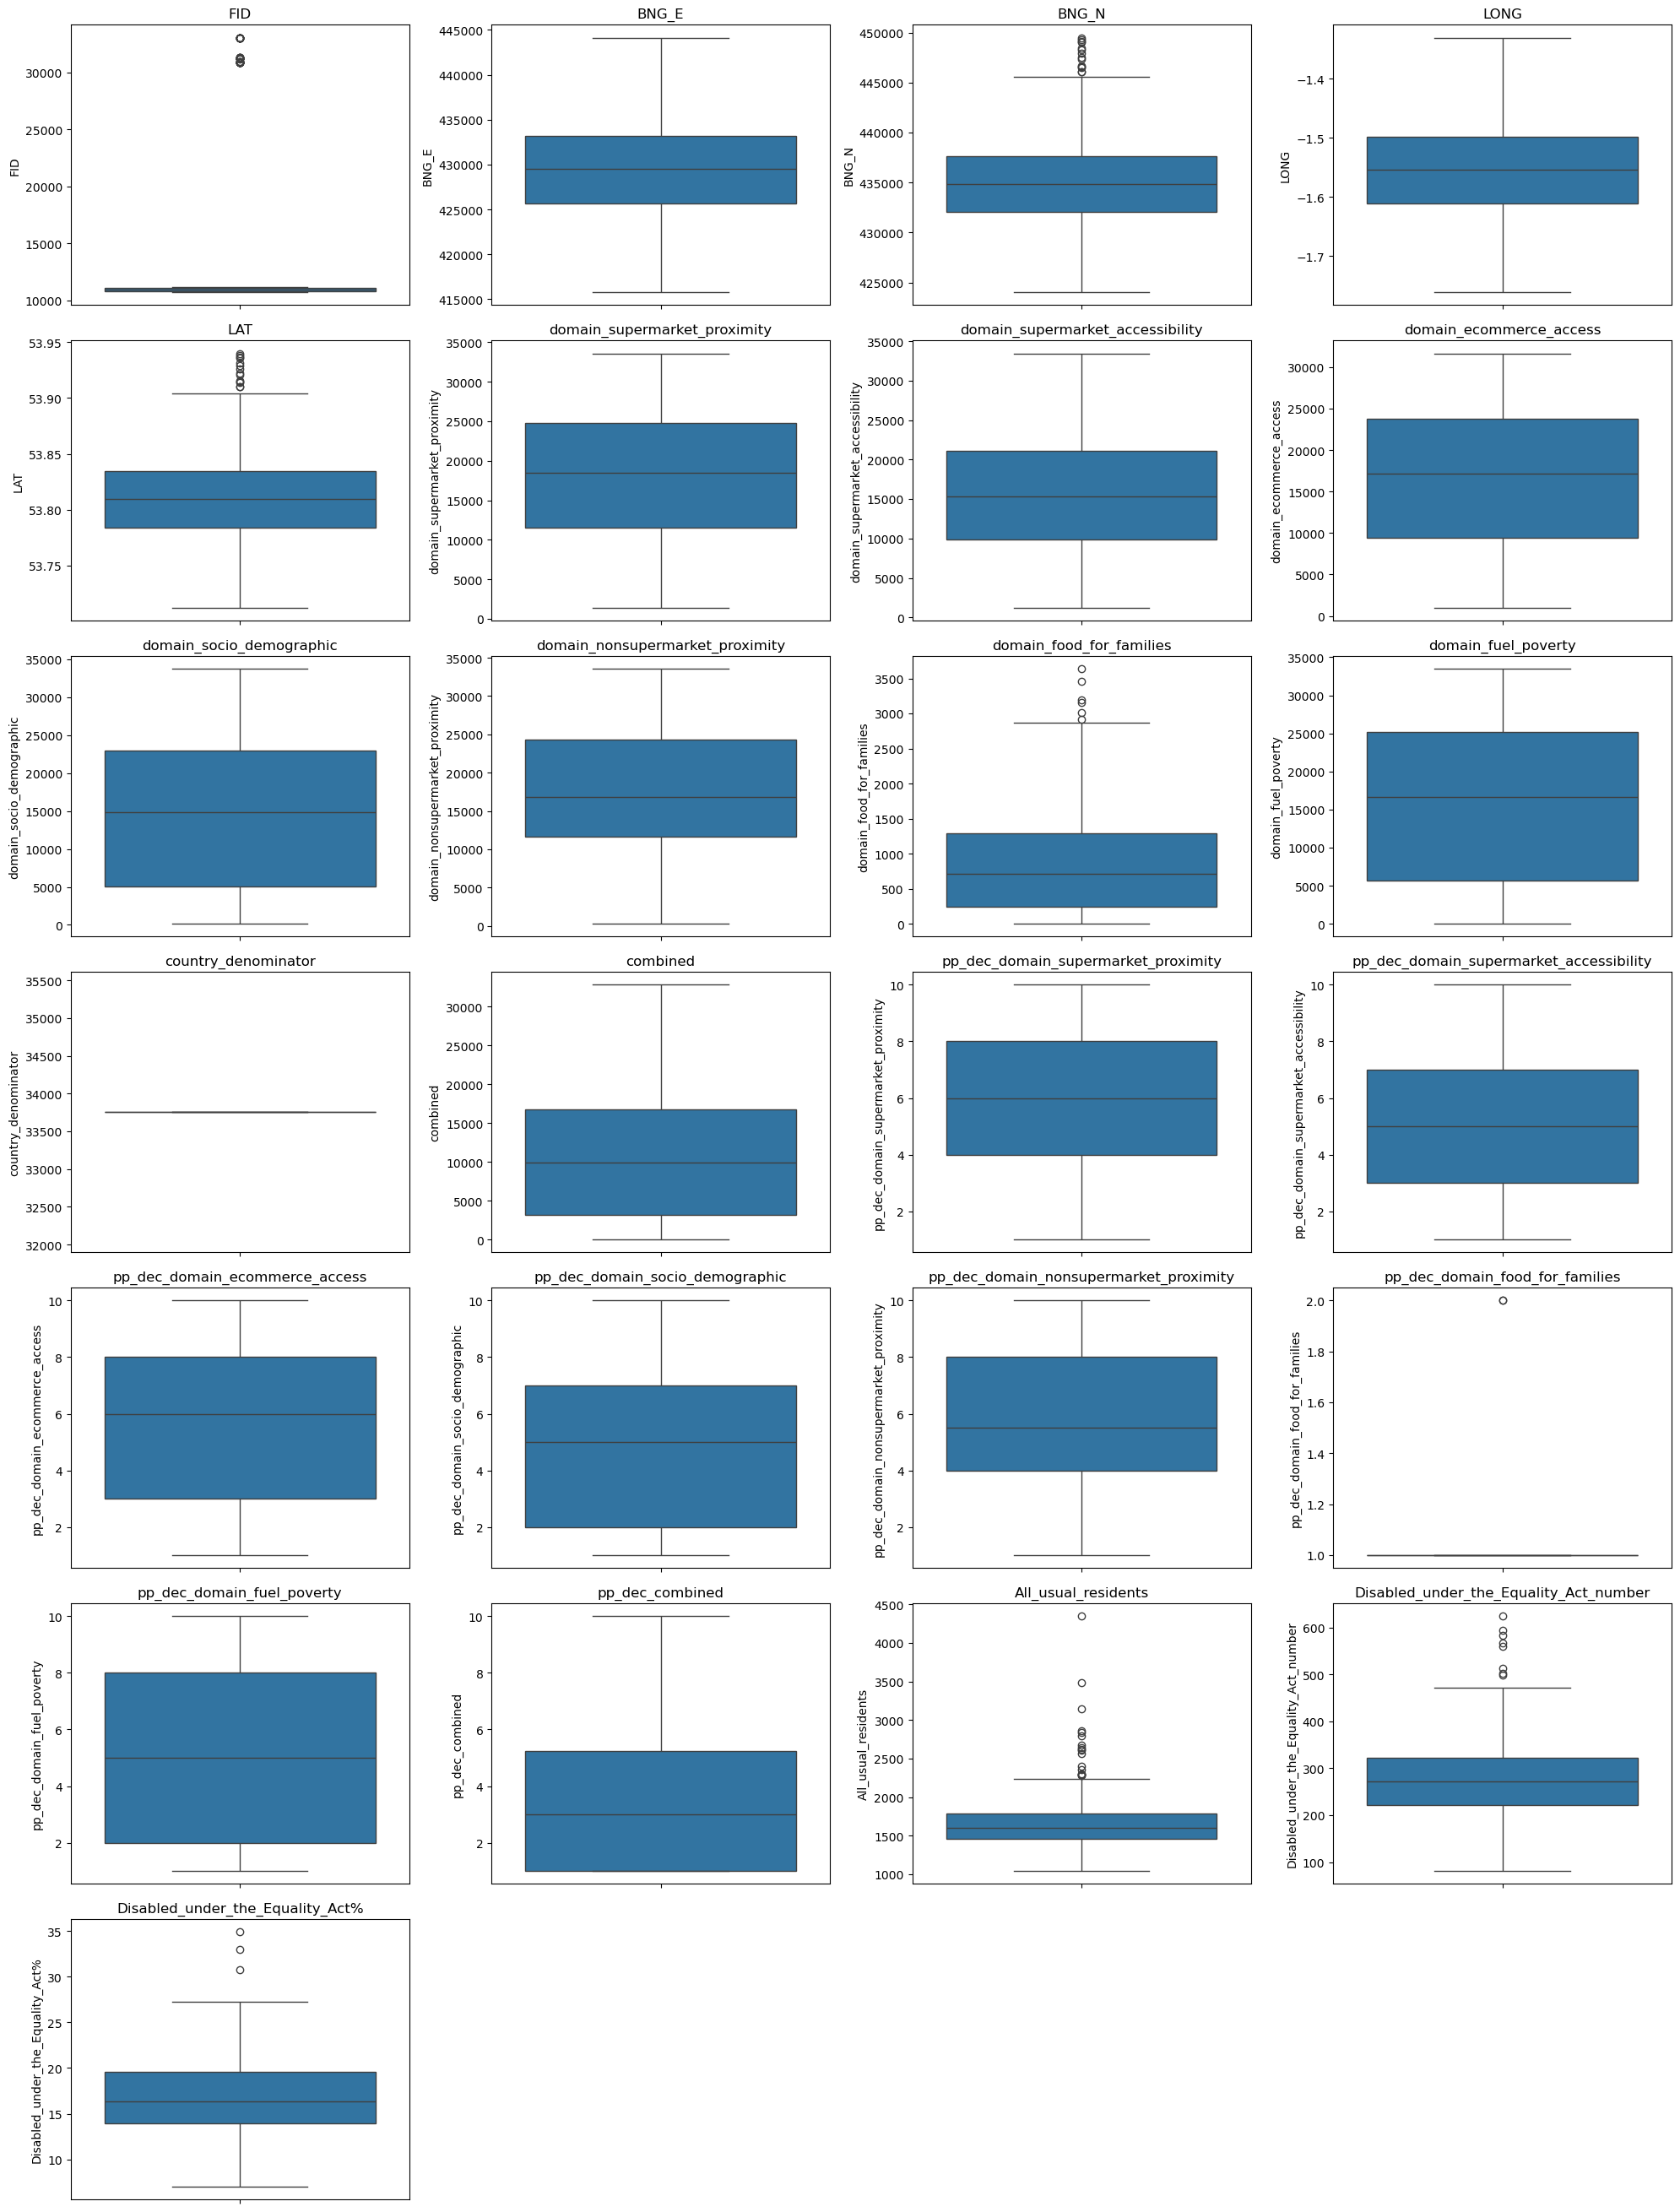

In [23]:
# Select only numeric columns
leeds_PPFI_dis_numeric = leeds_PPFI_dis.select_dtypes(include=np.number)
# Create a box plot for each numeric column
plt.figure(figsize=(20, 30)) # Set the size of the figure
for i, column in enumerate(leeds_PPFI_dis_numeric.columns, 1): # Loop over numeric columns
        plt.subplot(8, 4, i)   # Create a subplot for each column
        sns.boxplot(y=leeds_PPFI_dis_numeric[column]) # Create a boxplot of the column
        plt.title(column) # Set the title of the subplot to the column name

plt.tight_layout()   # Adjust subplots to fit into figure area
plt.show()    # Display the figure

**The data can be found to be largely cleanly processed, with no obvious outliers as well as missing values present.**

## Data visualisation  1
### Explore the association between PPFI domains and Disability rates
Using Spearman's rank correlation to explore the relationship.

This example utilizes Spearman's rank correlation to analyse the relationship between disability rates and each domain of the Priority Places for Food Index (PPFI) for each LSOA in Leeds. Spearman's rank correlation is particularly suitable for assessing relationships between ordinal variables and can effectively handle non-linear relationships while being robust to outliers. Given that the disability rate data is numerical and the PPFI data is ordinal, Spearman's rank correlation is an apt choice for calculating the correlation between these two sets of data. This method ensures that the analysis accommodates the ordered nature of the PPFI while addressing the continuity of the disability rates. This approach is particularly advantageous because it focuses on the strength of monotonic relationships rather than merely linear ones, ensuring a thorough and suitable analysis that respects the ordered nature of the PPFI while effectively managing the continuous nature of the disability rates.

In [24]:
# Calculate Spearman's rank correlation
ppfi_domains_dis_corr =leeds_PPFI_dis[['Disabled_under_the_Equality_Act%','domain_supermarket_proximity',
       'domain_supermarket_accessibility', 'domain_ecommerce_access',
       'domain_socio_demographic', 'domain_nonsupermarket_proximity',
       'domain_food_for_families', 'domain_fuel_poverty','combined']].corr(method = 'spearman')
ppfi_domains_dis_corr

,Disabled_under_the_Equality_Act%,domain_supermarket_proximity,domain_supermarket_accessibility,domain_ecommerce_access,domain_socio_demographic,domain_nonsupermarket_proximity,domain_food_for_families,domain_fuel_poverty,combined
Disabled_under_the_Equality_Act%,1.000000,0.130279,0.062567,-0.542662,-0.542598,-0.023543,0.089629,-0.386108,-0.600021
domain_supermarket_proximity,0.130279,1.000000,0.318851,-0.212719,-0.460770,0.502171,-0.457079,-0.343753,0.085583
domain_supermarket_accessibility,0.062567,0.318851,1.000000,-0.069306,-0.379995,0.399527,-0.342357,-0.402350,0.092409
domain_ecommerce_access,-0.542662,-0.212719,-0.069306,1.000000,0.685203,-0.171711,0.035731,0.558988,0.691476
domain_socio_demographic,-0.542598,-0.460770,-0.379995,0.685203,1.000000,-0.391257,0.307595,0.867157,0.669179
domain_nonsupermarket_proximity,-0.023543,0.502171,0.399527,-0.171711,-0.391257,1.000000,-0.687671,-0.360533,0.144465
domain_food_for_families,0.089629,-0.457079,-0.342357,0.035731,0.307595,-0.687671,1.000000,0.351711,-0.130280
domain_fuel_poverty,-0.386108,-0.343753,-0.402350,0.558988,0.867157,-0.360533,0.351711,1.000000,0.633314
combined,-0.600021,0.085583,0.092409,0.691476,0.669179,0.144465,-0.130280,0.633314,1.000000


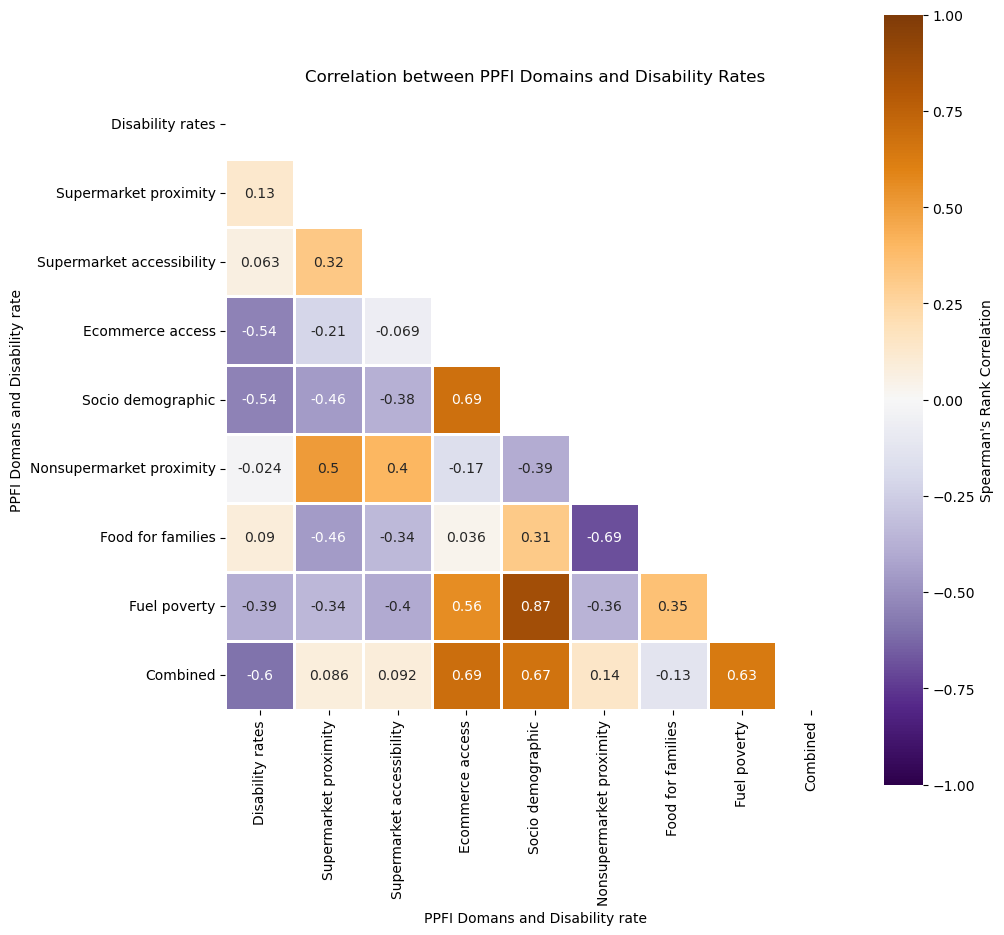

In [25]:
# Define the plot size for better visibility
fig, ax = plt.subplots(figsize=(10, 10))

# Create a mask for the upper triangle of the correlation matrix to avoid redundancy in the heatmap
mask = np.triu(np.ones_like(ppfi_domains_dis_corr, dtype=bool))

# Process column and index names to improve readability on the plot
# Replace underscores with spaces, remove 'domain ' prefix, and capitalize each word
def format_labels(labels):
    return [label.replace('_', ' ').replace('domain ', '').capitalize() for label in labels]

x_axis_labels = format_labels(ppfi_domains_dis_corr.columns)
y_axis_labels = format_labels(ppfi_domains_dis_corr.index)

# Modify the first label in both the x-axis and y-axis labels
x_axis_labels[0] = "Disability rates"
y_axis_labels[0] = "Disability rates"

# # Print the formatted labels to verify their appearance
# print('Formatted Labels:', x_axis_labels, y_axis_labels)

# Plot a heatmap of the correlation matrix
sns.heatmap(ppfi_domains_dis_corr,
            annot=True,  # Display Spearman's rank correlation values
            cmap='PuOr_r',  # Define color map
            vmin=-1,      # Set minimum color value
            vmax=1,       # Set maximum color value
            mask=mask,    # Apply mask to upper triangle
            linewidths=2, # Set linewidths to distinguish individual cells
            square=True,  # Ensure that each cell is square-shaped
            xticklabels=x_axis_labels,  # Use custom x-axis labels
            yticklabels=y_axis_labels,  # Use custom y-axis labels
            cbar_kws={'label': "Spearman's Rank Correlation"},  # Add a label
            ax=ax)  # Plot on the defined axis

# Set axis labels and title
ax.set_xlabel("PPFI Domans and Disability rate")
ax.set_ylabel("PPFI Domans and Disability rate")
ax.set_title('Correlation between PPFI Domains and Disability Rates')

# Display the plot
plt.show()

The calculations of Spearman's rank correlation coefficient indicate a negative correlation between the Preferred Place for Food Index (PPFI) and disability rates. This suggests that as the PPFI increases, disability rates tend to decrease. Further investigation is needed to understand the underlying factors contributing to this relationship and to assess the robustness of these findings. Among the seven domains of the PPFI, the disability rate shows a tendency for negative correlation specifically with the Socio-demographic Barriers domain and the Access to Online Deliveries domain (eCommerce). The other domains, however, do not exhibit significant signs of correlation with disability rates. Further analysis would be beneficial to explore and confirm these preliminary findings.

Note, however, that the analysis does come with certain limitations. While a negative correlation between the PPFI and disability rates is evident, it does not imply that a decrease in disability rates directly causes an increase in PPFI. There could be other confounding variables affecting the relationship that were not considered in this analysis. Additionally, the PPFI index encompasses multiple spatial data sets, and analysing spatial data typically requires addressing spatial dependence and spatial heterogeneity; the effects of spatial patterns and structural configurations may not be fully captured by Spearman's correlation alone. As such, this analysis should serve primarily as a guide, offering insights and considerations for **policymakers**, while also enhancing **public** awareness and understanding of the needs of the disabled community.

### Visualisation Choices

This visualisation uses Heatmap in Seaborn to depict the  Spearman's rank correlation coefficients between the domains and combined of PPFI and disability rates. Heatmaps are particularly adept at revealing complex relationships among multiple variables. They facilitate quick comprehension of data interactions, with colour shades effectively denoting the strength of positive and negative correlations within the correlation coefficient matrix.

In terms of axis labelling, this example enhances readability by simplifying the names of each variable—removing underscores, applying initial capitalization etc.

The <code>mask=mask</code> code strategically conceals the upper triangle of the correlation matrix, thus avoiding the redundancy of information and rendering the display more streamlined.

The use of <code>annot=True</code> allows observers to view specific numerical values directly, enhancing the precision of the data interpretation. Meanwhile, <code>square=True</code> ensures that each cell is uniformly square, augmenting the visual consistency and aesthetic appeal of the heatmap. <code>linewidths=2</code> serves the same purpose.

This example utilizes a diverging color mapping, specifically the **PuOr_r** scheme, which transitions from orange to purple. Darker colors indicate stronger correlations, while lighter colors show weaker ones. Bright orange represents positive values and deep purple indicates negative values. This color choice highlights the strengths of correlations effectively and allows for quick interpretation of data relationships. Additionally, the contrast between purple and orange is particularly accommodating for color-blind users, especially those with red-green color blindness, making PuOr_r an inclusive option for presenting data to a diverse audience.

<code>vmin=-1</code> and <code>vmax=1</code> set the minimum and maximum values for the colour mapping, meaning that the colours in the heatmap will be mapped according to a range of correlation coefficients (from -1 to 1) and in a more sensible way.

Finally, the axis labels, labels, and chart title are clearly labelled to increase the readability of the chart.

## Data visualisation 2
### Analysis of Disability rates Clustering in Leeds LSOAs
Use K-means to cluster. The same **leeds_PPFI_dis** handled above is used here.

### Determine the number of clusters using the elbow method.

C:\Users\52231\anaconda3\envs\spatial_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\52231\anaconda3\envs\spatial_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\52231\anaconda3\envs\spatial_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\52231\anaconda3\envs\spatial_env\Lib\site-packages\sklearn\cluster\_kmeans.p

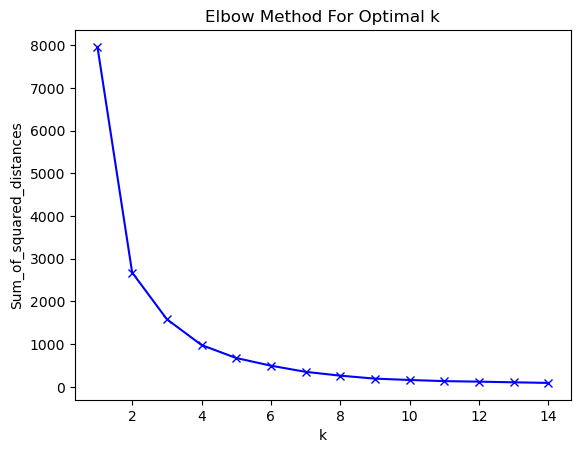

In [27]:
# Create an empty list to store the sum of squared distances for each k value
Sum_of_squared_distances = []

# get a range of numbers from 1 to 15
K = range(1,15)
# Loop through each k value in the specified range
for k in K:
    # create a k-means model with that number of clusters
    # set random state 
    km = cluster.KMeans(n_clusters=k, init="random", random_state=123)
    # Fit the KMeans model to the dataset using the specific variable (percentage of people recognized under the Equality Act as disabled)
    km = km.fit(leeds_PPFI_dis[['Disabled_under_the_Equality_Act%']].values)
    # calculate the sum of the squared distances and add this to the 'Sum_of_squared_distances' list we created earlier
    Sum_of_squared_distances.append(km.inertia_)

# Plot the sum of squared distances against the number of clusters using the Elbow Method
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

It's not very obvious to distinguish the elbow from the picture above, but I think the choice of 5 clusters is more applicable.

### Run the K-means model with N=5 clusters

In [28]:
# run the model with 5 clusters
km5 = cluster.KMeans(n_clusters=5,init="random", random_state=123)
km5cls = km5.fit(leeds_PPFI_dis[['Disabled_under_the_Equality_Act%']].values)

C:\Users\52231\anaconda3\envs\spatial_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [29]:
# Check the outcome
km5cls.labels_

array([0, 2, 4, 2, 0, 0, 4, 4, 4, 1, 0, 2, 1, 4, 4, 2, 4, 0, 0, 2, 1, 1,
       2, 0, 1, 3, 2, 2, 4, 0, 1, 2, 1, 1, 0, 0, 1, 4, 0, 2, 1, 1, 4, 4,
       4, 4, 2, 4, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2,
       2, 3, 2, 1, 0, 2, 1, 2, 2, 4, 0, 0, 1, 1, 2, 4, 1, 2, 4, 2, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 4, 4, 1, 3, 0, 1,
       1, 1, 2, 2, 1, 4, 2, 0, 0, 1, 1, 2, 4, 1, 1, 4, 2, 2, 1, 0, 3, 1,
       2, 1, 1, 0, 2, 2, 4, 1, 1, 4, 1, 1, 2, 1, 1, 2, 2, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 0, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 4,
       1, 4, 4, 1, 4, 4, 1, 1, 4, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 3, 2, 0,
       2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 4, 2, 0, 0, 3,
       1, 4, 1, 4, 2, 3, 1, 4, 4, 4, 4, 4, 1, 1, 0, 2, 1, 4, 0, 1, 2, 4,
       1, 4, 2, 1, 2, 0, 2, 4, 1, 1, 2, 0, 2, 3, 1, 2, 2, 1, 4, 1, 4, 0,
       1, 4, 4, 1, 1, 2, 0, 0, 4, 1, 4, 4, 4, 4, 4, 2, 1, 1, 2, 1, 1, 3,
       4, 2, 1, 1, 1, 0, 1, 1, 2, 1, 4, 4, 4, 1, 4,

In [30]:
# Add a new column with the cluster label
leeds_PPFI_dis['Cluster'] = km5cls.labels_
leeds_PPFI_dis['Cluster'].head()

0    0
1    2
2    4
3    2
4    0
Name: Cluster, dtype: int32

The violin plot allows a visual comparison of the data distribution of the disability rates in different Clusters, and in this case only a single variable is used, eliminating the need for a pairplot.

<Figure size 1200x800 with 0 Axes>

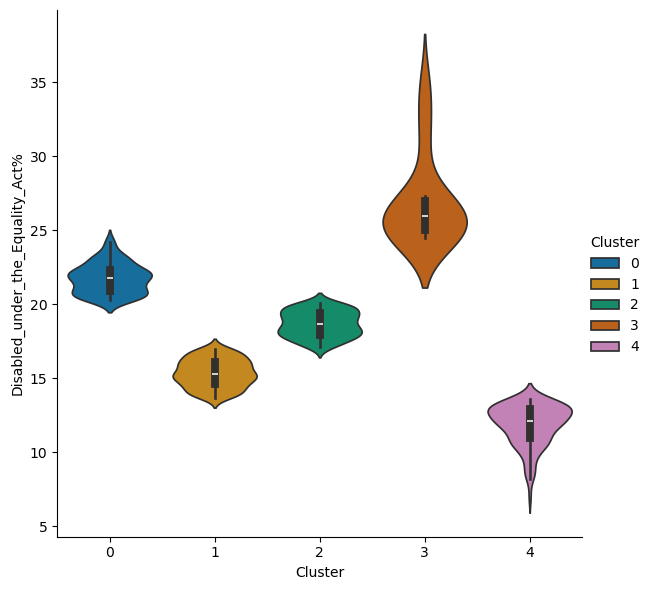

In [31]:
# Set the overall size of the figure
plt.figure(figsize=(12, 8))

# Create a violin plot using catplot to display the distribution of disability rates across different clusters
sns.catplot(
    x='Cluster',                         # Specify the variable for the x-axis
    y='Disabled_under_the_Equality_Act%', # Specify the variable for the y-axis
    hue='Cluster',                       # Use 'Cluster' to color-code the data
    kind='violin',                       # Specify the type of plot: 'violin'
    palette='colorblind',                # Choose a color palette that is colorblind-friendly
    height=6,                            # Set the height of each violin plot
    data=leeds_PPFI_dis                  # Provide the DataFrame containing the data
)

plt.show()  # Display the plot

Then name the different categories according to the diagram above.

In [32]:
# create empty column
leeds_PPFI_dis['Cluster_description']=""

# Define a dictionary mapping cluster numbers to their descriptions
cluster_descriptions = {
    0: 'High Disability Rate',
    1: 'Low Disability Rate',
    2: 'Moderate Disability Rate',
    3: 'Very High Disability Rate',
    4: 'Very Low Disability Rate'
}

# Apply the descriptions to the 'Cluster_description' column based on the 'Cluster' column values
leeds_PPFI_dis['Cluster_description'] = leeds_PPFI_dis['Cluster'].map(cluster_descriptions)

# Display the DataFrame to check the results 
leeds_PPFI_dis[['Cluster', 'Cluster_description']].head()

,Cluster,Cluster_description
0,0,High Disability Rate
1,2,Moderate Disability Rate
2,4,Very Low Disability Rate
3,2,Moderate Disability Rate
4,0,High Disability Rate


In [33]:
# Check the CRS of Geodata
leeds_PPFI_dis.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

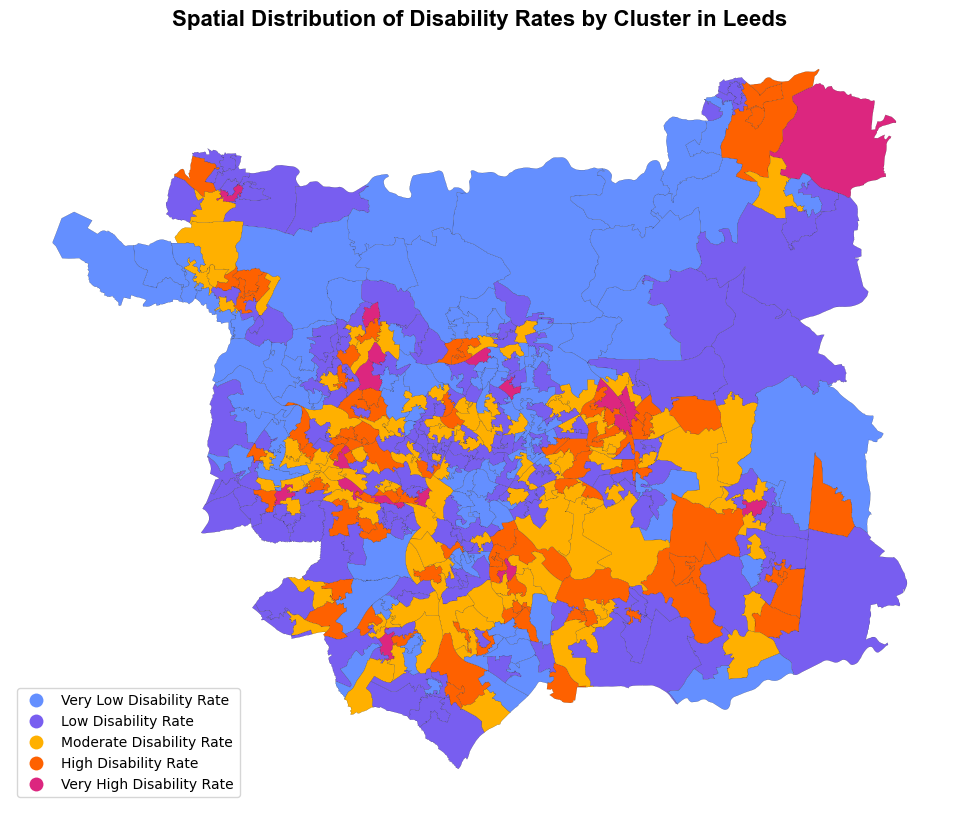

In [34]:
# Define a dictionary for color mapping corresponding to each disability rate level
colorblind = {
    'Very Low Disability Rate': '#648FFF',  # light blue
    'Low Disability Rate': '#785EF0',       # purple
    'Moderate Disability Rate': '#FFB000',  # yellow
    'High Disability Rate': '#FE6100',      # orange
    'Very High Disability Rate': '#DC267F'  # pink
}

# Define the order of categories to display
categories_order = [
    'Very Low Disability Rate',
    'Low Disability Rate',
    'Moderate Disability Rate',
    'High Disability Rate',
    'Very High Disability Rate'
]

# Convert the 'Cluster_description' column to an ordered categorical type
leeds_PPFI_dis['Cluster_description'] = pd.Categorical(
    leeds_PPFI_dis['Cluster_description'],
    categories=categories_order,
    ordered=True
)

# Create a colormap using the predefined color dictionary and ordered categories
cmap = matplotlib.colors.ListedColormap([colorblind[label] for label in categories_order])

# Plot the map
f, ax = plt.subplots(1, figsize=(15, 10))  # Define the size of the figure
leeds_PPFI_dis.plot(
    column='Cluster_description',  # Specify the column to use for coloring
    cmap=cmap,  # Apply the created colormap
    legend=True,  # Display the legend
    legend_kwds={'loc': 'lower left'},  # Position the legend in the lower left corner
    linewidth=0.1,  # Set the linewidth for polygon edges
    edgecolor='black',  # Set the edge color of polygons to black
    ax=ax
)

# Set the title with styling options
plt.title('Spatial Distribution of Disability Rates by Cluster in Leeds',
          fontdict={'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Arial'})

ax.set_axis_off()  # Hide axis
plt.show()  # Display the plot

K-means clustering analysis was employed to categorize the disability rates across the Lower Super Output Areas (LSOAs) in Leeds into five distinct classes. These classifications were then effectively visualized using Choropleth maps. This map could show the pattern of spatial distribution of disability rates in Leeds. K-means clustering is lauded for its simplicity and intuitiveness. The algorithm is straightforward, making it relatively easy to implement, and the results are typically easy to interpret and understand. However, due to its simplistic nature, the model may sometimes sacrifice accuracy and comprehensiveness. Additionally, it might overlook the spatial autocorrelation inherent in geographic locations in this example.

The visualisation programme can help **policymakers** to accurately allocate healthcare resources, social services, etc. according to differences in disability rates in different regions. At the same time, it can also help **the public** to enhance their knowledge and understanding of persons with disabilities through understanding the disability rates in their own regions, thus creating a more inclusive social atmosphere. Similarly, through public concern and discussion, it can also push the government and relevant departments to take action to improve the living environment and conditions of people with disabilities.

### Visualisation Choices
For this visualization, I have selected a **colour scheme** that accommodates colour blindness, sourced from David Math Logic(https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40), which is provided by the BIM. Additionally, the five categories have been ordered to ensure that data are displayed and analysed in a logical sequence from ‘very low disability’ to ‘very high disability’, and a gradient colour scheme has been employed to reflect changes in the disability rate. The low disability rate is kept in a calm blue colour, transitioning through yellow and orange to a medium-high disability rate, and finally a striking pink colour to indicate the highest disability rate. This restructured colour design not only maintains the logical consistency of the map's colours but also enhances visibility for colour-blind users, allowing them to distinguish more clearly between different data categories. This approach significantly improves the map's readability and the effectiveness of its message delivery.

<code>linewidth=0.1</code> and <code>edgecolor='black'</code> enhancethe overall readability of the map with minimal line widths and solid edge colour.

The legend is placed in the lower left corner to avoid obscuring any important data on the map while maintaining easy access.

Finally, a concise and custom-styled title was added to clearly indicate what the map represents.
In addition, there is only one layer in this image, so I chose not to make any changes to the **map transparency**, leaving the default at 1. Range of view is the same.

All in all, I think this is a very rigorous and effective visualisation map. The choices of Choropleth Mapping, Color Scheme and its logic, and Category Ordering have been carefully considered for modification to ensure optimal clarity and effectiveness in the visualization.